##### Installing latest version of albumentation because old code doesn't has Coarseout

In [0]:
# For increasing RAM
# a = []
# while(1):
#   a.append('1')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !pip install albumentations==0.4.5

In [0]:
%matplotlib inline

### Importing Libraries

In [0]:
# !ls

In [0]:
# Changing working directory
import os
os.chdir('./drive/My Drive/EVA4/assignment12/')

In [0]:
!pwd

/content/drive/My Drive/EVA4/assignment12


In [0]:
from download import download_image, segregate

In [0]:
# !pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7233ce9f9195cde1917f46812ee11ee5d0b2d682e8a2de7e2e5e9e35377f56ae
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
os.getcwd()

'/content/drive/My Drive/EVA4/assignment12'

In [6]:
%%time
download_image("http://cs231n.stanford.edu/tiny-imagenet-200.zip")
segregate()

Downloadinghttp://cs231n.stanford.edu/tiny-imagenet-200.zip


[========================================================================] 100%


CPU times: user 1min 33s, sys: 2min 37s, total: 4min 10s
Wall time: 45min 26s


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
# from gradcam import *

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import math

from dataset import Data
from model import ResNet18

### Downloading train and test dataset using (dataset) module

In [0]:
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models

In [5]:
%%time
data = Data()
trainset = data.getTrainDataSet()
testset = data.getTestDataSet()

Train Data Size :  77000
Train Data Size :  33000
CPU times: user 422 ms, sys: 90.9 ms, total: 513 ms
Wall time: 1.68 s


### Creating Test/Train Dataloaders, another train and test loaders to visualise image and gradcam loader which will be used in visualising images using GradCAM

In [0]:
train_loader = data.getDataLoader(dataset=trainset,batches=256)
# val_loader = data.getDataLoader(valset, 64)
test_loader = data.getDataLoader(testset,256)
img_train_loader = data.getDataLoader(trainset,4)
# img_val_loader = data.getDataLoader(valset, 4)
img_test_loader = data.getDataLoader(testset,4)
test_grad_loader = data.getDataLoader(testset,1)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### Visualizing images



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(166) tensor(120) tensor(76) tensor(181)


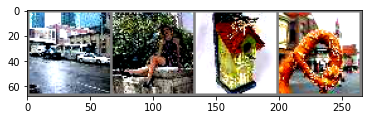

In [7]:
from general_utils import imshow

# get some random training images
dataiter = iter(img_train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % (labels[j]) for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


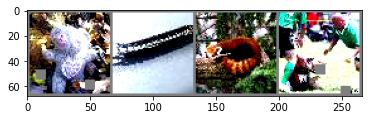

In [8]:
for data, classes in img_train_loader:
  out = torchvision.utils.make_grid(data)
  imshow(out)
  break

### Model Parameters

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# netobj = torchvision.models.resnet18(pretrained=False, num_classes=200)
netobj = ResNet18()
model = netobj.to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

### Finding Best Learning rate through (lr_finder) module

In [0]:
from general_utils import lr_finder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder(model, optimizer, criterion, train_loader)
#lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(train_loader, end_lr=100, num_iter=100, step_mode="exp")

UnidentifiedImageError: ignored

### Training and Testing Loss

In [0]:
from train_ import train
from test_ import test
from torch.optim.lr_scheduler import ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()


# lr_lambda = lambda epoch: round(0.1 * 1/(1 + 0.319 * epoch), 10)
# lr_lambda1 = lambda epoch : (epoch*0.7)\


model =  netobj.to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.7, nesterov=True) #lr =1e-3
# # scheduler = StepLR(optimizer, step_size=1, gamma=1.1)
# scheduler = StepLR(optimizer, step_size=1, gamma=1.2)

optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=0.0025)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=3, verbose=True, 
#                               threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr = 0.001, max_lr = 0.05, step_size_up=5, step_size_down=20, mode='triangular2')

EPOCHS = 50


test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
lr_= []
# loss=1000
# loss = 1000
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print("EPOCH :", epoch)
    trainacc, loss = train(model, device, train_loader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(model, device, test_loader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step()
    # lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr = param_group['lr']
    lr_.append(lr)
print('Finished Training')

  0%|          | 0/301 [00:00<?, ?it/s]

lr=  0.001
EPOCH : 0


Epoch= 0 Loss=4.734435558319092 Batch_id=300 Accuracy=5.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.718066 Test Accuracy= 6.03030303030303
lr=  0.010800000000000008
EPOCH : 1


Epoch= 1 Loss=3.725473642349243 Batch_id=300 Accuracy=18.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.8186412 Test Accuracy= 14.224242424242425
lr=  0.020600000000000018
EPOCH : 2


Epoch= 2 Loss=3.1517443656921387 Batch_id=300 Accuracy=32.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.3359294 Test Accuracy= 10.775757575757575
lr=  0.030400000000000028
EPOCH : 3


Epoch= 3 Loss=3.1843039989471436 Batch_id=300 Accuracy=31.50: 100%|██████████| 301/301 [02:56<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.2771716 Test Accuracy= 24.01818181818182
lr=  0.040199999999999986
EPOCH : 4


Epoch= 4 Loss=2.959378242492676 Batch_id=300 Accuracy=30.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.314013 Test Accuracy= 25.86969696969697
lr=  0.04999999999999999
EPOCH : 5


Epoch= 5 Loss=2.8080148696899414 Batch_id=300 Accuracy=44.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.3698776 Test Accuracy= 25.048484848484847
lr=  0.04755
EPOCH : 6


Epoch= 6 Loss=2.6980209350585938 Batch_id=300 Accuracy=43.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.7372792 Test Accuracy= 32.875757575757575
lr=  0.0451
EPOCH : 7


Epoch= 7 Loss=2.5285720825195312 Batch_id=300 Accuracy=50.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.221392 Test Accuracy= 29.972727272727273
lr=  0.042649999999999993
EPOCH : 8


Epoch= 8 Loss=2.39897084236145 Batch_id=300 Accuracy=50.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.0519896 Test Accuracy= 31.093939393939394
lr=  0.04020000000000001
EPOCH : 9


Epoch= 9 Loss=2.3170812129974365 Batch_id=300 Accuracy=54.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.686725 Test Accuracy= 35.7030303030303
lr=  0.037750000000000006
EPOCH : 10


Epoch= 10 Loss=2.389963388442993 Batch_id=300 Accuracy=57.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.643208 Test Accuracy= 38.33030303030303
lr=  0.035300000000000005
EPOCH : 11


Epoch= 11 Loss=2.006525993347168 Batch_id=300 Accuracy=65.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.596019 Test Accuracy= 39.85454545454545
lr=  0.032850000000000004
EPOCH : 12


Epoch= 12 Loss=2.195655107498169 Batch_id=300 Accuracy=62.00: 100%|██████████| 301/301 [02:56<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5004852 Test Accuracy= 41.17878787878788
lr=  0.0304
EPOCH : 13


Epoch= 13 Loss=2.069038152694702 Batch_id=300 Accuracy=62.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5528455 Test Accuracy= 40.68787878787879
lr=  0.02795
EPOCH : 14


Epoch= 14 Loss=2.078023910522461 Batch_id=300 Accuracy=65.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2749019 Test Accuracy= 42.375757575757575
lr=  0.025499999999999995
EPOCH : 15


Epoch= 15 Loss=1.9130650758743286 Batch_id=300 Accuracy=67.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.418563 Test Accuracy= 42.7939393939394
lr=  0.023049999999999994
EPOCH : 16


Epoch= 16 Loss=1.965183973312378 Batch_id=300 Accuracy=67.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3815775 Test Accuracy= 43.448484848484846
lr=  0.020599999999999993
EPOCH : 17


Epoch= 17 Loss=1.7718420028686523 Batch_id=300 Accuracy=65.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4881003 Test Accuracy= 42.8969696969697
lr=  0.018150000000000003
EPOCH : 18


Epoch= 18 Loss=1.7367472648620605 Batch_id=300 Accuracy=73.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4477582 Test Accuracy= 46.2939393939394
lr=  0.0157
EPOCH : 19


Epoch= 19 Loss=1.5643647909164429 Batch_id=300 Accuracy=74.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2206926 Test Accuracy= 46.806060606060605
lr=  0.013249999999999998
EPOCH : 20


Epoch= 20 Loss=1.3783115148544312 Batch_id=300 Accuracy=81.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.271218 Test Accuracy= 47.1030303030303
lr=  0.010800000000000008
EPOCH : 21


Epoch= 21 Loss=1.171866774559021 Batch_id=300 Accuracy=82.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3244927 Test Accuracy= 47.693939393939395
lr=  0.008350000000000007
EPOCH : 22


Epoch= 22 Loss=1.0585379600524902 Batch_id=300 Accuracy=84.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2857776 Test Accuracy= 49.484848484848484
lr=  0.005900000000000004
EPOCH : 23


Epoch= 23 Loss=0.7908358573913574 Batch_id=300 Accuracy=90.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.115354 Test Accuracy= 51.13333333333333
lr=  0.003450000000000002
EPOCH : 24


Epoch= 24 Loss=0.48054972290992737 Batch_id=300 Accuracy=95.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1365821 Test Accuracy= 53.93939393939394
lr=  0.001
EPOCH : 25


Epoch= 25 Loss=0.33936652541160583 Batch_id=300 Accuracy=94.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.6467047 Test Accuracy= 55.345454545454544
lr=  0.005900000000000004
EPOCH : 26


Epoch= 26 Loss=0.7764331102371216 Batch_id=300 Accuracy=91.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.0997813 Test Accuracy= 49.75151515151515
lr=  0.010800000000000008
EPOCH : 27


Epoch= 27 Loss=1.421318769454956 Batch_id=300 Accuracy=84.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4933324 Test Accuracy= 43.972727272727276
lr=  0.015700000000000013
EPOCH : 28


Epoch= 28 Loss=1.2941933870315552 Batch_id=300 Accuracy=87.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5681112 Test Accuracy= 42.17878787878788
lr=  0.020600000000000018
EPOCH : 29


Epoch= 29 Loss=1.5047191381454468 Batch_id=300 Accuracy=84.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3981726 Test Accuracy= 43.29090909090909
lr=  0.025499999999999995
EPOCH : 30


Epoch= 30 Loss=1.606465458869934 Batch_id=300 Accuracy=80.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4443662 Test Accuracy= 42.24848484848485
lr=  0.024274999999999994
EPOCH : 31


Epoch= 31 Loss=1.4185633659362793 Batch_id=300 Accuracy=84.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5072625 Test Accuracy= 40.68787878787879
lr=  0.023049999999999994
EPOCH : 32


Epoch= 32 Loss=1.3632400035858154 Batch_id=300 Accuracy=83.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2202356 Test Accuracy= 43.52121212121212
lr=  0.021824999999999994
EPOCH : 33


Epoch= 33 Loss=1.4156564474105835 Batch_id=300 Accuracy=86.00: 100%|██████████| 301/301 [02:56<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6322782 Test Accuracy= 44.845454545454544
lr=  0.020599999999999993
EPOCH : 34


Epoch= 34 Loss=1.1319903135299683 Batch_id=300 Accuracy=91.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5913513 Test Accuracy= 44.372727272727275
lr=  0.019375000000000003
EPOCH : 35


Epoch= 35 Loss=1.2794731855392456 Batch_id=300 Accuracy=86.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3970842 Test Accuracy= 42.03333333333333
lr=  0.018150000000000003
EPOCH : 36


Epoch= 36 Loss=1.1317496299743652 Batch_id=300 Accuracy=91.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2621915 Test Accuracy= 44.68181818181818
lr=  0.016925000000000003
EPOCH : 37


Epoch= 37 Loss=1.0388038158416748 Batch_id=300 Accuracy=91.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2574885 Test Accuracy= 46.054545454545455
lr=  0.0157
EPOCH : 38


Epoch= 38 Loss=0.9607905745506287 Batch_id=300 Accuracy=94.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.6751194 Test Accuracy= 43.09090909090909
lr=  0.014474999999999998
EPOCH : 39


Epoch= 39 Loss=0.770373523235321 Batch_id=300 Accuracy=96.50: 100%|██████████| 301/301 [02:56<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2323987 Test Accuracy= 46.63030303030303
lr=  0.013249999999999998
EPOCH : 40


Epoch= 40 Loss=0.7082359790802002 Batch_id=300 Accuracy=95.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3040726 Test Accuracy= 46.45454545454545
lr=  0.012025000000000011
EPOCH : 41


Epoch= 41 Loss=0.651939868927002 Batch_id=105 Accuracy=95.31:  35%|███▌      | 106/301 [01:03<01:53,  1.71it/s]

Text(0, 0.5, 'Accuracy')

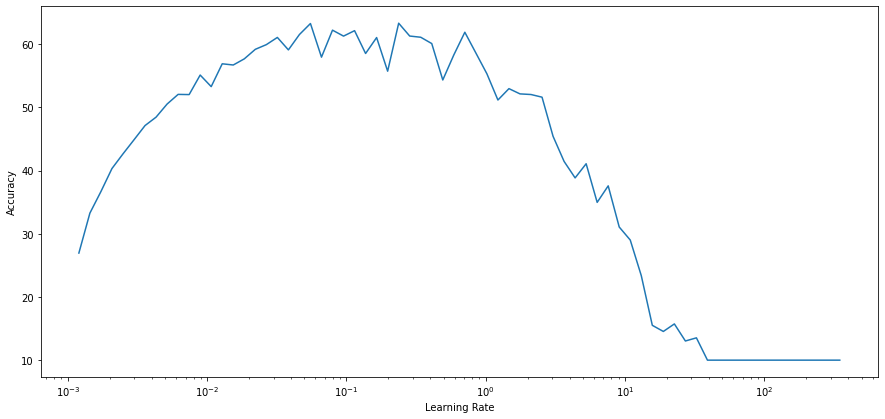

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(2,1,1)
line, =ax.plot(lr_, test_acc)
ax.set_xscale("log")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")

### Maximum LR = 0.055 (from the above graph)

In [0]:
# max_lr = 0.055
# base_lr = 0.0055

In [0]:
from train_ import train
from test_ import test
from torch.optim.lr_scheduler import CyclicLR, StepLR
criterion = nn.CrossEntropyLoss()

model =  netobj.to(device)
optimizer = optim.SGD(model.parameters(), lr=5e-3, momentum=0.79, weight_decay = 0.0085)

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr = 0.0055, max_lr = 0.055, step_size_up=5,
                                              step_size_down=19, mode='triangular2')

EPOCHS = 24


test_acc_c = []
train_acc_c = []
trainloss_c = []
testloss_c = []
lr_c= []
epoch_c = []
# loss=1000
# loss = 1000
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print("EPOCH :", epoch)
    trainacc, loss = train(model, device, train_loader, optimizer, criterion, epoch)
    train_acc_c.append(trainacc)
    testacc, loss1 = test(model, device, test_loader, criterion)
    test_acc_c.append(testacc)
    trainloss_c.append(loss)
    testloss_c.append(loss1)
    epoch_c.append(epoch)
    scheduler.step()
    # lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr = param_group['lr']
    lr_c.append(lr)
print('Finished Training')


  0%|          | 0/98 [00:00<?, ?it/s]

lr=  0.0055
EPOCH : 0


/content/drive/My Drive/EVA4/assignment11/model11.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
Epoch= 0 Loss=2.001192808151245 Batch_id=97 Accuracy=50.00: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 2.0391674 Test Accuracy= 44.4
lr=  0.015400000000000018
EPOCH : 1


Epoch= 1 Loss=1.9895647764205933 Batch_id=97 Accuracy=52.38: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.9333296 Test Accuracy= 50.03
lr=  0.025299999999999982
EPOCH : 2


Epoch= 2 Loss=1.9062790870666504 Batch_id=97 Accuracy=59.82: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.8784945 Test Accuracy= 53.86
lr=  0.0352
EPOCH : 3


Epoch= 3 Loss=1.9093427658081055 Batch_id=97 Accuracy=61.01: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.9275932 Test Accuracy= 55.7
lr=  0.045100000000000015
EPOCH : 4


Epoch= 4 Loss=1.8393402099609375 Batch_id=97 Accuracy=68.45: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.8565644 Test Accuracy= 61.27
lr=  0.05499999999999998
EPOCH : 5


Epoch= 5 Loss=1.8301807641983032 Batch_id=97 Accuracy=72.32: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.8539945 Test Accuracy= 62.43
lr=  0.052394736842105265
EPOCH : 6


Epoch= 6 Loss=1.7601454257965088 Batch_id=97 Accuracy=76.79: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7711293 Test Accuracy= 70.04
lr=  0.04978947368421052
EPOCH : 7


Epoch= 7 Loss=1.7153347730636597 Batch_id=97 Accuracy=82.44: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7138844 Test Accuracy= 73.71
lr=  0.0471842105263158
EPOCH : 8


Epoch= 8 Loss=1.7138421535491943 Batch_id=97 Accuracy=84.82: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7622566 Test Accuracy= 74.08
lr=  0.04457894736842105
EPOCH : 9


Epoch= 9 Loss=1.7078825235366821 Batch_id=97 Accuracy=83.04: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7395552 Test Accuracy= 76.48
lr=  0.041973684210526316
EPOCH : 10


Epoch= 10 Loss=1.6822898387908936 Batch_id=97 Accuracy=85.42: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7752453 Test Accuracy= 70.15
lr=  0.03936842105263159
EPOCH : 11


Epoch= 11 Loss=1.7008323669433594 Batch_id=97 Accuracy=83.63: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7176114 Test Accuracy= 76.96
lr=  0.036763157894736845
EPOCH : 12


Epoch= 12 Loss=1.6825834512710571 Batch_id=97 Accuracy=85.42: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7210379 Test Accuracy= 76.24
lr=  0.034157894736842116
EPOCH : 13


Epoch= 13 Loss=1.6909165382385254 Batch_id=97 Accuracy=84.52: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7100387 Test Accuracy= 75.66
lr=  0.03155263157894736
EPOCH : 14


Epoch= 14 Loss=1.6533434391021729 Batch_id=97 Accuracy=91.07: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.7028068 Test Accuracy= 80.86
lr=  0.02894736842105263
EPOCH : 15


Epoch= 15 Loss=1.656347393989563 Batch_id=97 Accuracy=89.58: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6669396 Test Accuracy= 84.11
lr=  0.026342105263157903
EPOCH : 16


Epoch= 16 Loss=1.6584534645080566 Batch_id=97 Accuracy=89.58: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6460905 Test Accuracy= 84.87
lr=  0.023736842105263146
EPOCH : 17


Epoch= 17 Loss=1.621998906135559 Batch_id=97 Accuracy=92.26: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6600177 Test Accuracy= 84.3
lr=  0.021131578947368425
EPOCH : 18


Epoch= 18 Loss=1.6123383045196533 Batch_id=97 Accuracy=92.26: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6438296 Test Accuracy= 83.36
lr=  0.018526315789473696
EPOCH : 19


Epoch= 19 Loss=1.5987437963485718 Batch_id=97 Accuracy=93.45: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6331568 Test Accuracy= 85.77
lr=  0.01592105263157894
EPOCH : 20


Epoch= 20 Loss=1.5917104482650757 Batch_id=97 Accuracy=93.75: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6357547 Test Accuracy= 85.15
lr=  0.013315789473684211
EPOCH : 21


Epoch= 21 Loss=1.5620959997177124 Batch_id=97 Accuracy=94.05: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6021738 Test Accuracy= 87.83
lr=  0.010710526315789483
EPOCH : 22


Epoch= 22 Loss=1.589720368385315 Batch_id=97 Accuracy=94.94: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test Loss= 1.6130602 Test Accuracy= 88.82
lr=  0.008105263157894727
EPOCH : 23


Epoch= 23 Loss=1.5807703733444214 Batch_id=97 Accuracy=95.54: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]
100%|██████████| 20/20 [00:01<00:00, 10.54it/s]

Test Loss= 1.5950018 Test Accuracy= 90.25
Finished Training


### Learning Rate versus Epoch Graph

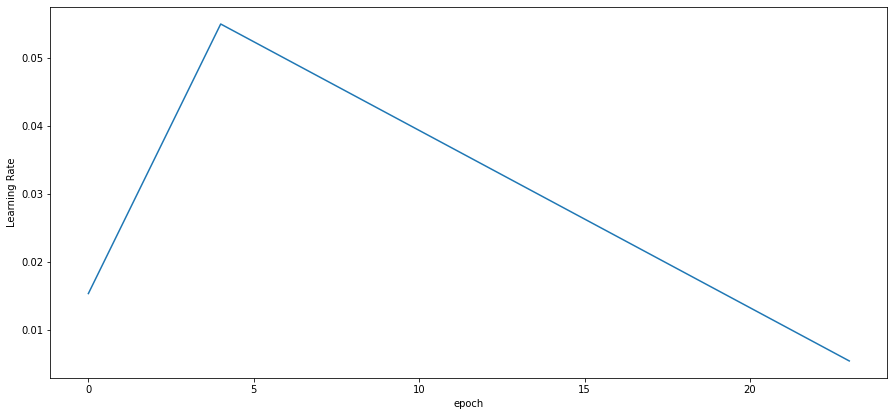

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,1,1)
line, =ax.plot(epoch_c, lr_c)
ax.set_xlabel("epoch")
ax.set_ylabel("Learning Rate")
plt.savefig('LearningRate_Epoch.png')

### Plotting Train and Test Accuracy curves

Text(0, 0.5, 'Accuracy')

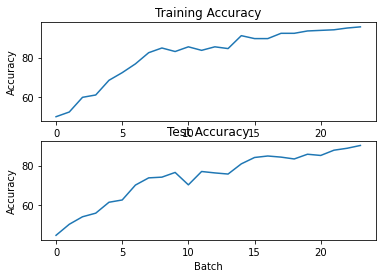

In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc_c)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc_c)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")